# 다중 회귀 분석 
 - 종속변수 y 가 독립변수 x1,x2,....,xi 과 어떤 관계가 있는지 보여주는 식.

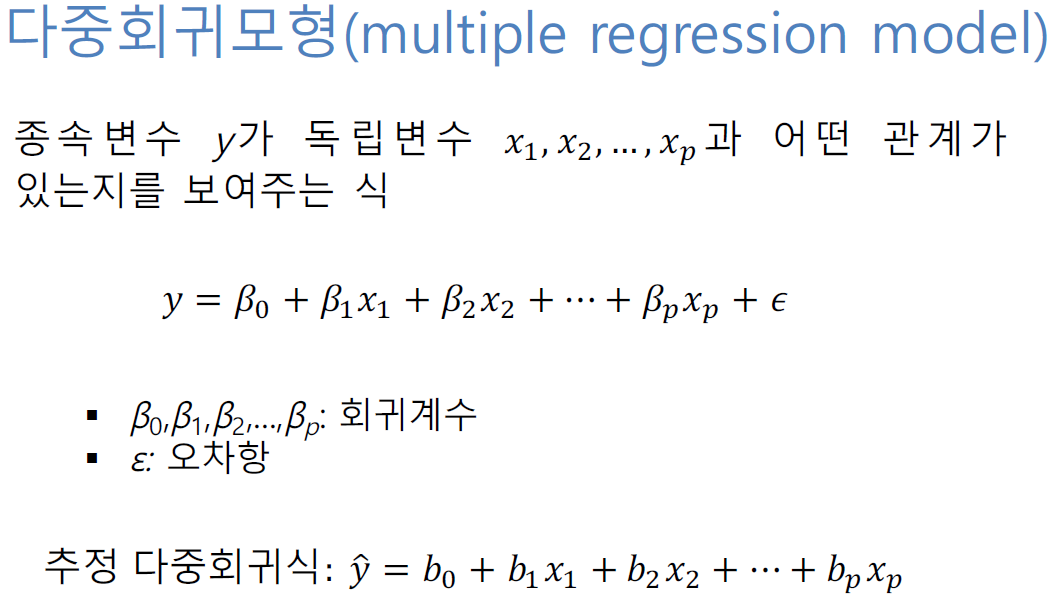

In [3]:
library("IRdisplay")
display_png(file="kmu/5/1.png", width = 600)  

## Programmer 급여 조사 
 - 소프트웨어 회사가 20명의 프로그래머 급여를 수집하였다. 급여가 경력연수나 직무적성 검사성적과 연관성을 갖는지 결정하기 위해 <br> 회귀분석을 사용하기로 했다

In [16]:
salary <- read.csv("SLData/salary.csv")
head(salary)
summary(salary)

,experience,score,salary
1,4,78,24
2,7,100,43
3,1.0,86.0,23.7
4,5.0,82.0,34.3
5,8.0,86.0,35.8
6,10,84,38


   experience        score            salary     
 Min.   : 0.00   Min.   : 70.00   Min.   :22.20  
 1st Qu.: 3.00   1st Qu.: 77.25   1st Qu.:27.80  
 Median : 5.50   Median : 82.50   Median :30.85  
 Mean   : 5.20   Mean   : 82.75   Mean   :31.23  
 3rd Qu.: 7.25   3rd Qu.: 87.25   3rd Qu.:34.67  
 Max.   :10.00   Max.   :100.00   Max.   :43.00  

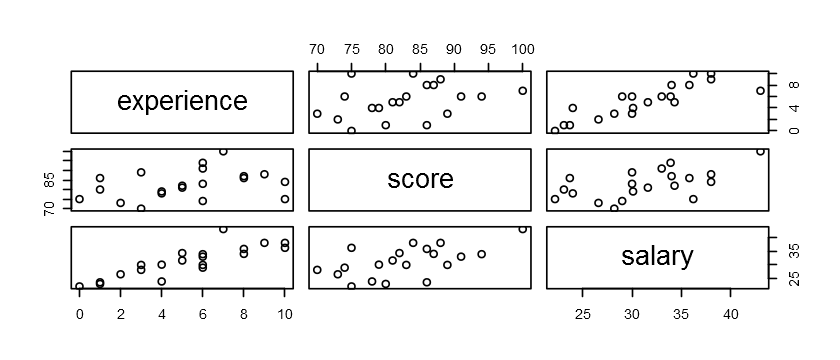

In [21]:
options(repr.plot.width=7, repr.plot.height=3)
pairs(salary)

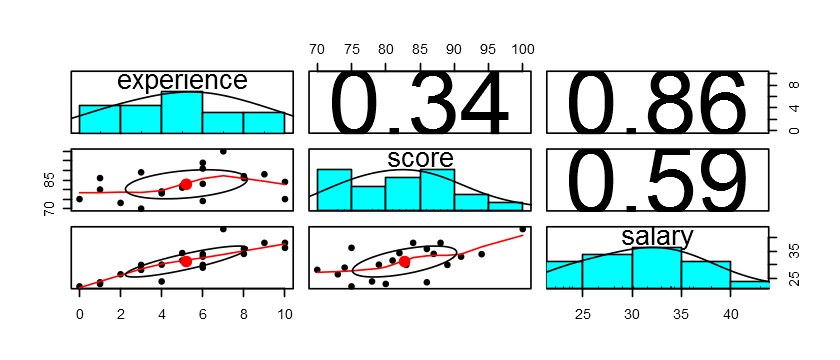

In [22]:
library(psych)
pairs.panels(salary)

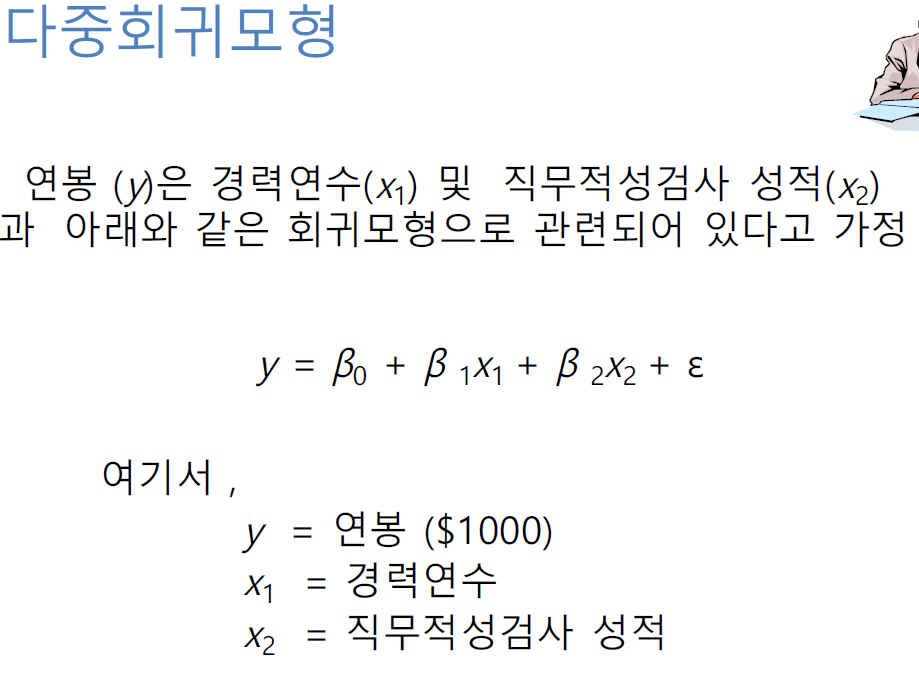

In [4]:
display_png(file="kmu/5/3.png", width=600)  

In [16]:
model <- lm(salary~experience+score, data=salary)  #3개변수
model


Call:
lm(formula = salary ~ experience + score, data = salary)

Coefficients:
(Intercept)   experience        score  
     3.1739       1.4039       0.2509  


In [17]:
model <- lm(salary~., data=salary)   #위와 같은 내용, salary를 제외한 모든 내용을 변수로
model


Call:
lm(formula = salary ~ ., data = salary)

Coefficients:
(Intercept)   experience        score  
     3.1739       1.4039       0.2509  


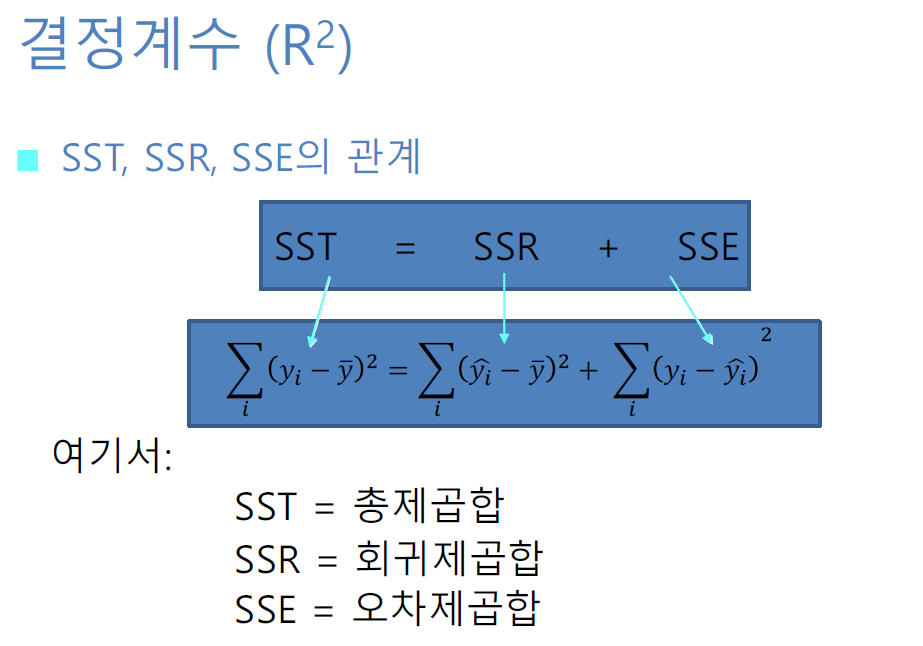

In [10]:
display_png(file="kmu/5/4.png", width=600)  

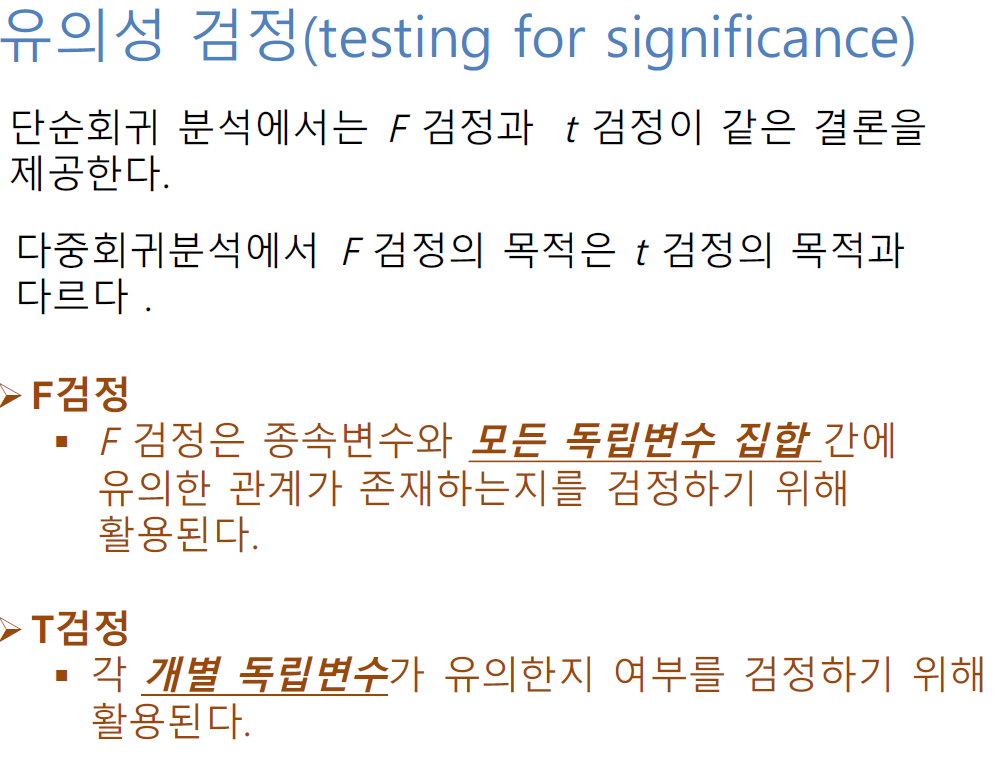

In [11]:
display_png(file="kmu/5/6.png", width=600)  

## 설명 ↓
 - F-검정 : 선형회귀에서는 베타1이 0인 경우였으나, 지금은 변수가 여러 개
 - F-test의 P-value가 매우 작다. Ho를 기각한다. 회귀식이 유의하다!
 - T-검정 : Ho가 각 베타i가 0인지 아닌지, 개별 test (from 베타1 ~ 베타끝)
  - Intercept, 즉 베타0에서는 P-value가 크다. 베타0는 0같다.
    - 보통 베타0는 큰 의미를 가지지 않는다.
  - 각 베타i의 경우, experience와 score의 P-value가 작아서 둘다 유의하다. (Ho 기각)
  - 2개 변수 둘다 유의하다 (y를 설명할 수 있는 변수로서 작용한다)

In [17]:
summary(model)


Call:
lm(formula = salary ~ experience + score, data = salary)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3586 -1.4581 -0.0341  1.1862  4.9102 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.17394    6.15607   0.516  0.61279    
experience   1.40390    0.19857   7.070 1.88e-06 ***
score        0.25089    0.07735   3.243  0.00478 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.419 on 17 degrees of freedom
Multiple R-squared:  0.8342,	Adjusted R-squared:  0.8147 
F-statistic: 42.76 on 2 and 17 DF,  p-value: 2.328e-07


## 설명
             Estimate Std. Error t value Pr(>|t|)    
    (Intercept)  3.17394    6.15607   0.516  0.61279    
    experience   1.40390    0.19857   7.070 1.88e-06 ***
    score        0.25089    0.07735   3.243  0.00478 ** 
    
 - p-value =  0.61279  로 >= 0.05 ( y절편을 0으로 만들 필요가 없다. 큰 의미가 없기 때문에 => 회귀식만 바뀐다.)
 - Salary = 3.174 + 1.404(Experience) + 0.251(score)  
 - bi 는 모든 다른 독립변수가 일정할때 xi의 1단위 변화에 대한 y값 변화의 추정치 
  - b1 = 1.404 
       - 경력 연수가 1년 증가할때 연봉이 1404 달러 증가할 것으로 기대된다. ( 직무적정 검사가 일정할 때 ) 
  - b2 = 0.251 
       - 직무적성검사 성적이 1점 올라갈때 연봉은 251 달러  올라갈 것으로 기대 된다 ( 경력이 일정하다고 할 때 ) 

In [19]:
summary(lm(salary~experience, data=salary))


Call:
lm(formula = salary ~ experience, data = salary)

Residuals:
   Min     1Q Median     3Q    Max 
-5.291 -1.441  0.249  0.719  8.849 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.8111     1.3761  16.576 2.39e-12 ***
experience    1.6200     0.2313   7.004 1.54e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.991 on 18 degrees of freedom
Multiple R-squared:  0.7316,	Adjusted R-squared:  0.7167 
F-statistic: 49.06 on 1 and 18 DF,  p-value: 1.541e-06


## 설명 ↑ 
 - 결정계수의 경우, 설명변수의 수가 증가하면 언제나 증가한다 (줄어들지 않는다)
  - 설명 변수 ( 독립 변수 ) 의 갯수가 위에는 1개 그 이전에는 2개 였다 => 그 이전의 Summary 에서 Multiple R-squared 가 더 높다.
 - 변수의 개수를 고려한 새로운 결정계수가 필요 -> 수정 다중 결정 계수 ( <font size=4 blod> Adjusted R-squared </font> ) 이다. 
  - Adjusted R-squared:  0.7167 

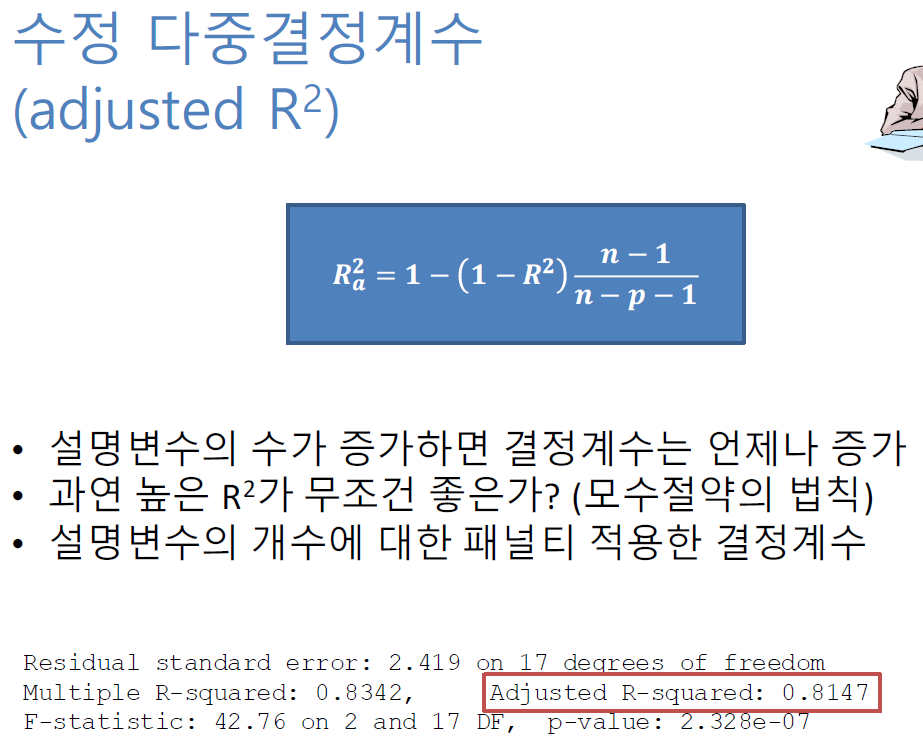

In [9]:
display_png(file="kmu/5/5.png", width=600)  

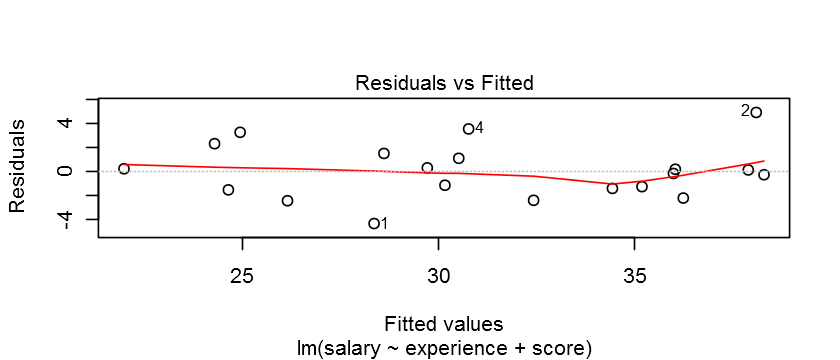

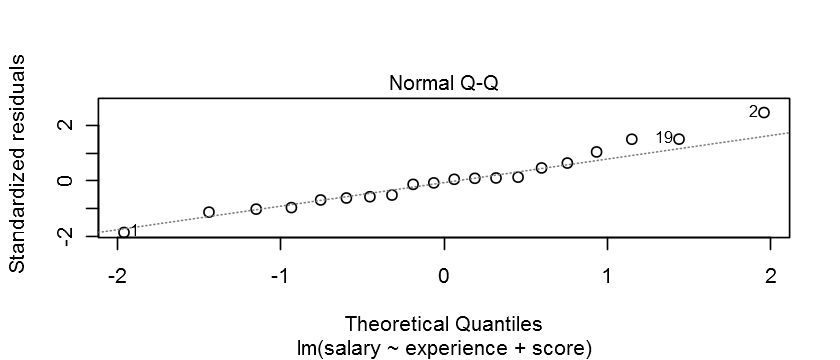

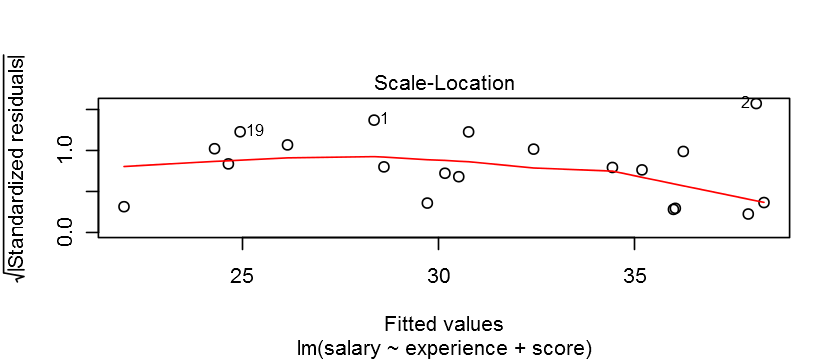

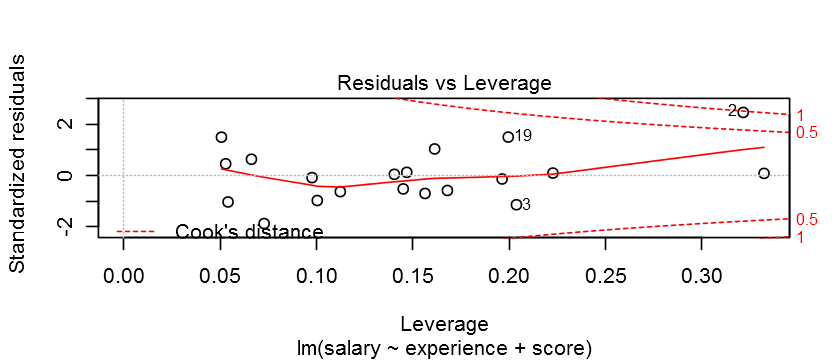

In [22]:
# residual plot -> 2번 관측치가 Cook's distance를 벗어남, 영향점
plot(model)

In [24]:
head(salary)

,experience,score,salary
1,4,78,24
2,7,100,43
3,1.0,86.0,23.7
4,5.0,82.0,34.3
5,8.0,86.0,35.8
6,10,84,38


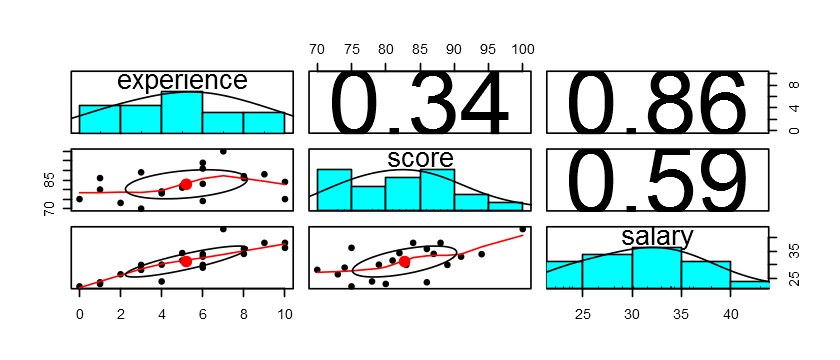

In [28]:
pairs.panels(salary, col=2)

In [32]:
cl <- rep(1,20)
cl
cl[2] = 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

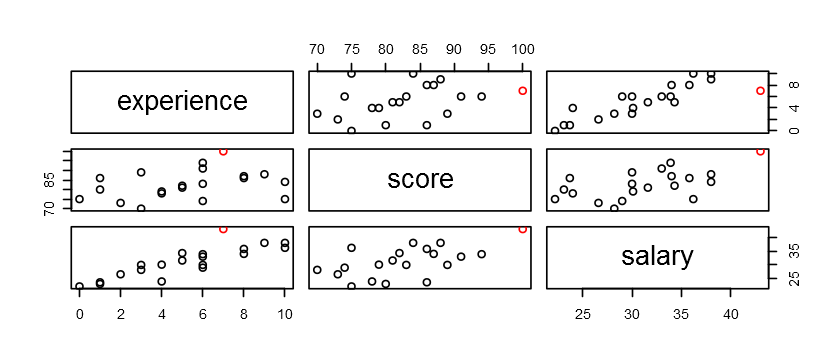

In [34]:
pairs(salary,col=cl)  #색을 빨간색으로 바꾼다 (on 2번 관측치)

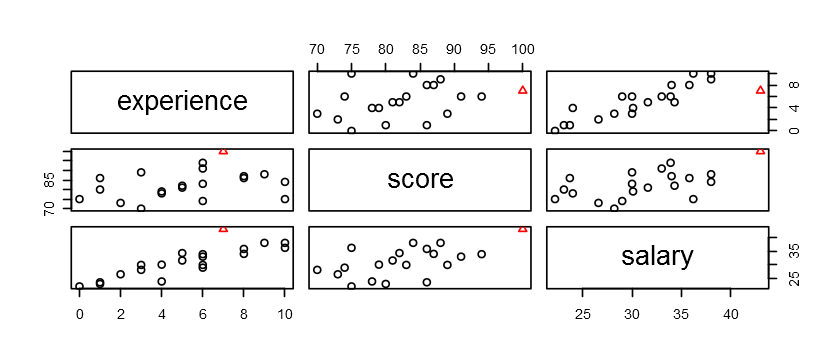

In [37]:
pairs(salary,col=cl,pch=cl)   #다른 모양으로 한다 (on 2번 관측치)
## 2번 관측치는 경력에 비해 높은 연봉을 받는다
## 2번을 빼야 할 지 말지는 결정하기 애매하다 (예-해외스카웃)

In [40]:
model2 <- lm(salary~., data=salary[-2,])
## 결국 2번 관측치를 뺀다 -> 주관적으로 판단하여 결정한다 (수량적 근거를 만들 수 없다)
summary(model2)


Call:
lm(formula = salary ~ ., data = salary[-2, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5221 -1.4259  0.1133  1.3351  3.8131 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.31238    5.93883   2.073   0.0547 .  
experience   1.42607    0.16426   8.682 1.89e-07 ***
score        0.13469    0.07486   1.799   0.0909 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.999 on 16 degrees of freedom
Multiple R-squared:  0.8592,	Adjusted R-squared:  0.8416 
F-statistic: 48.83 on 2 and 16 DF,  p-value: 1.542e-07


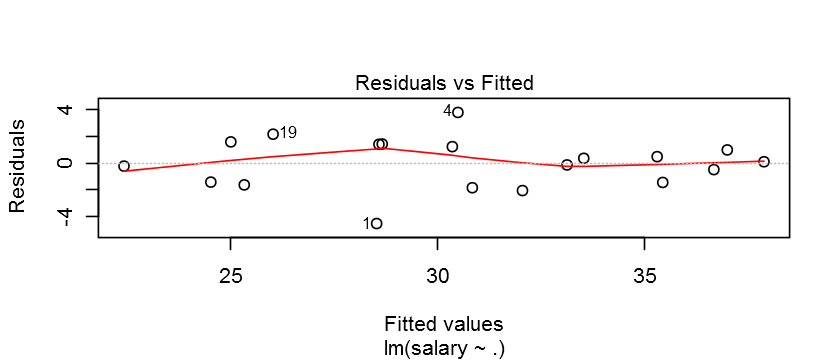

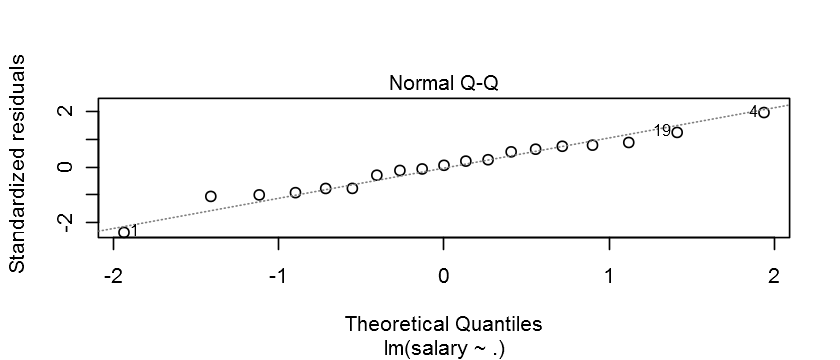

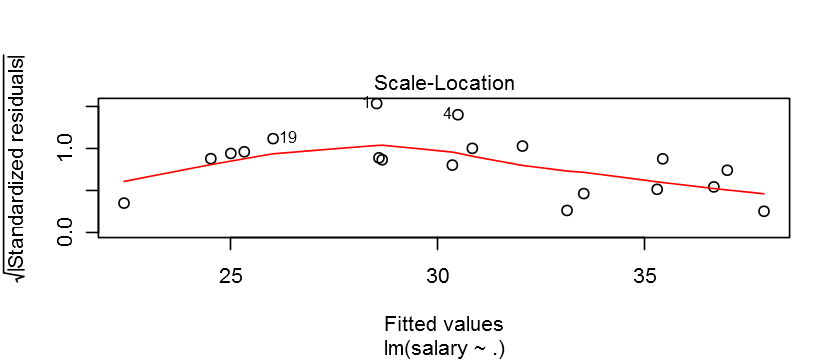

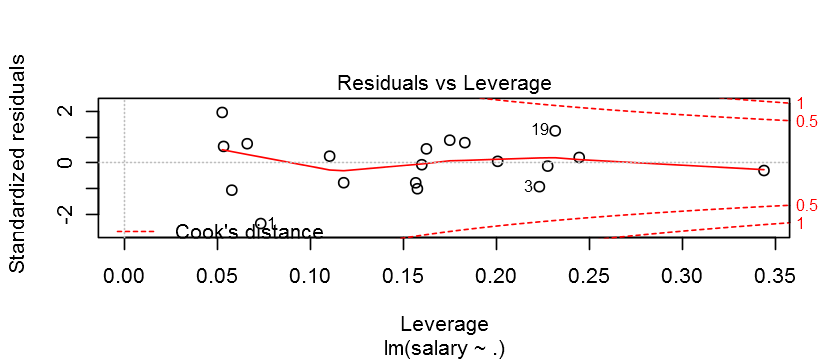

In [42]:
plot(model2)   #영향점이 없다 

## 추측과 예측

In [45]:
predict(model, data.frame("experience"=c(5,10), "score"=c(80,70)),
        interval="confidence")
## 신뢰구간 : 평균 연봉이 29,045 ~ 31.483 in (5,80)

,fit,lwr,upr
1,30.26428,29.04555,31.48302
2,34.77494,31.24174,38.30815


In [47]:
predict(model, data.frame("experience"=c(5,10), "score"=c(80,70)),
        interval="prediction")
## 예측 : 구간이 넓어진다

,fit,lwr,upr
1,30.26428,25.01763,35.51094
2,34.77494,28.56804,40.98184


## 다중공산성 : 독립변수 사이의 상관관계

In [18]:
head(attitude,3)
#cor(attitude)
round(cor(attitude),3)

,rating,complaints,privileges,learning,raises,critical,advance
1,43,51,30,39,61,92,45
2,63,64,51,54,63,73,47
3,71,70,68,69,76,86,48


,rating,complaints,privileges,learning,raises,critical,advance
rating,1.000,0.825,0.426,0.624,0.590,0.156,0.155
complaints,0.825,1.000,0.558,0.597,0.669,0.188,0.225
privileges,0.426,0.558,1.000,0.493,0.445,0.147,0.343
learning,0.624,0.597,0.493,1.000,0.640,0.116,0.532
raises,0.590,0.669,0.445,0.640,1.000,0.377,0.574
critical,0.156,0.188,0.147,0.116,0.377,1.000,0.283
advance,0.155,0.225,0.343,0.532,0.574,0.283,1.000


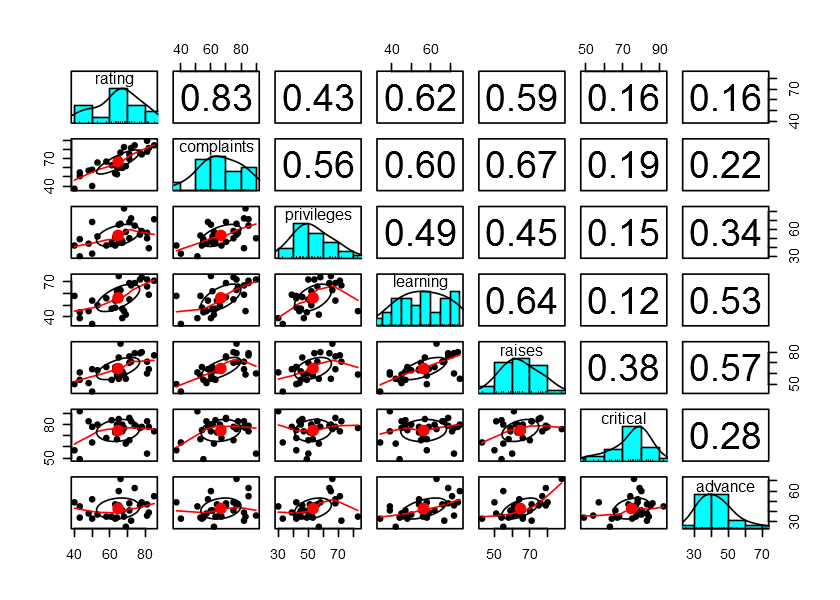

In [26]:
options(repr.plot.width=7, repr.plot.height=5)
pairs.panels(attitude)

In [53]:
summary(lm(rating~complaints+learning,attitude))
## complaint와 learning의 상관계수가 0.6


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5568  -5.7331   0.6701   6.5341  10.3610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.8709     7.0612   1.398    0.174    
complaints    0.6435     0.1185   5.432 9.57e-06 ***
learning      0.2112     0.1344   1.571    0.128    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.817 on 27 degrees of freedom
Multiple R-squared:  0.708,	Adjusted R-squared:  0.6864 
F-statistic: 32.74 on 2 and 27 DF,  p-value: 6.058e-08


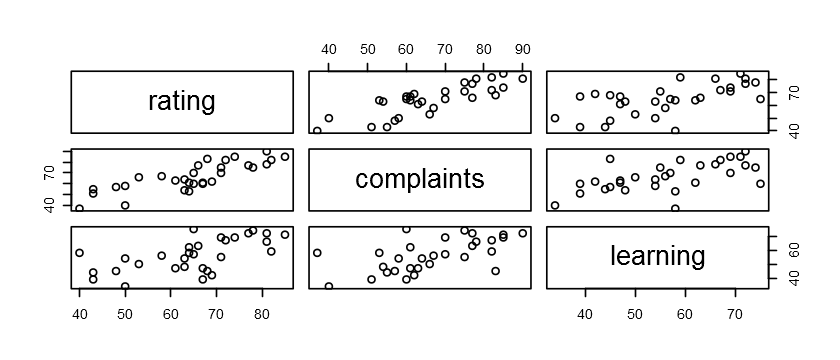

In [55]:
plot(attitude[,c(1,2,4)])

 - 0.2112가 별로 의미가 없어 보이지만, 사실 learning~rating도 관련이 있고,
 - complaint와 rating의 관계도 있는데, 합쳐놓고 보니 learning의 역할이 작아보이는 것뿐이다
 - learning과 complaint와의 관계도 존재하기 때문이다 

## 모형선택방법

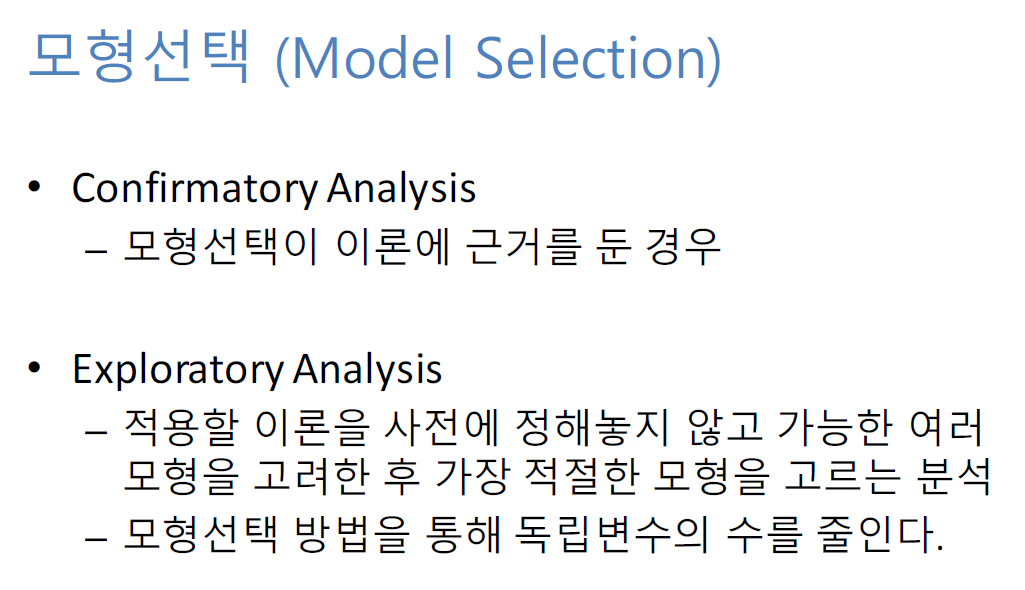

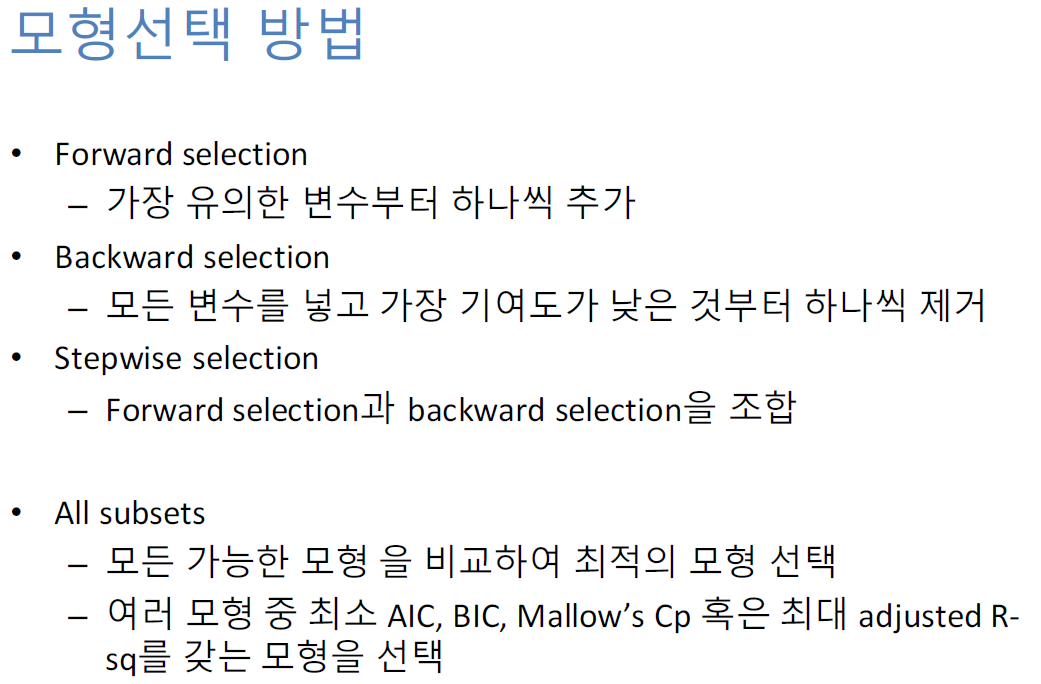

In [14]:
display_png(file="kmu/5/7.png", width=600)  
display_png(file="kmu/5/8.png", width=600)  

In [29]:
out11 <- lm(rating~., attitude)
summary(out11)
## P-value를 기준으로, critical의 값이 가장 의미가 없다 -> 빼자!


Call:
lm(formula = rating ~ ., data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9418  -4.3555   0.3158   5.5425  11.5990 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.78708   11.58926   0.931 0.361634    
complaints   0.61319    0.16098   3.809 0.000903 ***
privileges  -0.07305    0.13572  -0.538 0.595594    
learning     0.32033    0.16852   1.901 0.069925 .  
raises       0.08173    0.22148   0.369 0.715480    
critical     0.03838    0.14700   0.261 0.796334    
advance     -0.21706    0.17821  -1.218 0.235577    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.068 on 23 degrees of freedom
Multiple R-squared:  0.7326,	Adjusted R-squared:  0.6628 
F-statistic:  10.5 on 6 and 23 DF,  p-value: 1.24e-05


In [28]:
out12 <- lm(rating~.-critical, attitude)
summary(out12)


Call:
lm(formula = rating ~ . - critical, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.8088  -4.8353   0.4199   5.5775  11.5276 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.79791    8.49061   1.507 0.144785    
complaints   0.61315    0.15783   3.885 0.000704 ***
privileges  -0.07224    0.13303  -0.543 0.592122    
learning     0.31172    0.16202   1.924 0.066300 .  
raises       0.09795    0.20842   0.470 0.642621    
advance     -0.21111    0.17328  -1.218 0.234956    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.929 on 24 degrees of freedom
Multiple R-squared:  0.7318,	Adjusted R-squared:  0.6759 
F-statistic:  13.1 on 5 and 24 DF,  p-value: 3.278e-06


## ANOVA TABLE

In [65]:
anova(out11)  #Sum Sq <- Sum of Square : R의 변동성의 의미

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
complaints,1.000000e+00,2.927584e+03,2.927584e+03,5.860263e+01,9.055953e-08
privileges,1.0000000,7.5185616,7.5185616,0.1505021,0.7016233
learning,1.0000000,137.2474717,137.2474717,2.7473376,0.1109956
raises,1.0000000,0.9421751,0.9421751,0.0188599,0.8919640
critical,1.00000000,0.56383674,0.56383674,0.01128655,0.91631458
advance,1.000000,74.110044,74.110044,1.483490,0.235577
Residuals,23.00000,1149.00032,49.95654,NA,NA


## 설명 ↑ 
 - R의 변동성이 유의한지 안한지가 P-value로 표현됨
 - 여러개 설명변수의 영향력을 동시에 제거 한 경우, 변동성 분석

## 하나씩 빼기가 어렵다면 ( 선별 작업 ) 

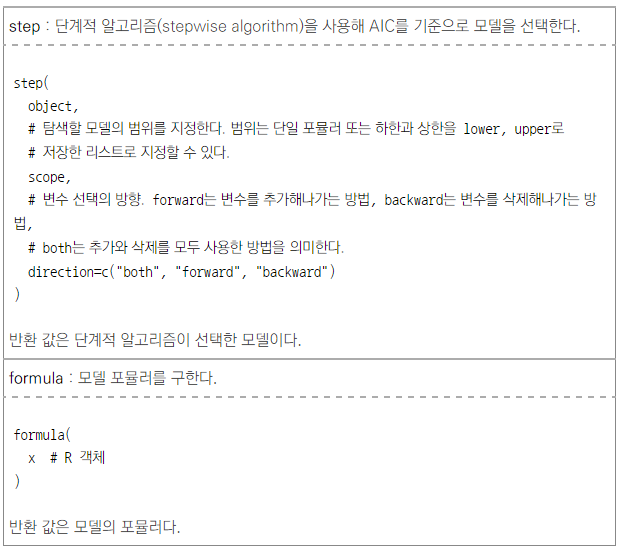

In [15]:
display_png(file="kmu/5/2.png", width=600)  

## 변수 선택 방법
- 중선형 회귀 모델에서의 설명 변수를 선택하는 방법 중 한 가지는 특정 기준 <br> (예를 들면, F 통계량이나 AIC7 을 사용해 변수를 하나씩 택하거나 제거하는 것이다.<br>단계적 변수 선택 방법은 다음의 3가지 경우로 구분할 수 있다.

1. 전진 선택법(forward selection) : 절편만 있는 모델에서 기준 통계치를 가장 많이 개선시키는 변수를 차례로 추가하는 방법이다.
2. 변수 소거법(backward elimination) : 모든 변수가 포함된 모델에서 기준 통계치에 가장 도움이 되지 않는 변수를 하나씩 제거하는 방법이다.
3. 단계적 방법(stepwise selection) : 모든 변수가 포함된 모델에서 출발하여 기준 통계치에 가장 도움이 되지 않는 변수를 삭제하거나, 모델에서 빠져 있는 변수 중에서 기준 통계치를 가장 개선시키는 변수를 추가한다. 그리고 이러한 변수의 추가 또는 삭제를 반복한다. 반대로 절편만 포함된 모델에서 출발해 변수의 추가, 삭제를 반복할 수도 있다.

In [67]:
backward <- step(out11, direction="backward")
backward

Start:  AIC=123.36
rating ~ complaints + privileges + learning + raises + critical + 
    advance

             Df Sum of Sq    RSS    AIC
- critical    1      3.41 1152.4 121.45
- raises      1      6.80 1155.8 121.54
- privileges  1     14.47 1163.5 121.74
- advance     1     74.11 1223.1 123.24
<none>                    1149.0 123.36
- learning    1    180.50 1329.5 125.74
- complaints  1    724.80 1873.8 136.04

Step:  AIC=121.45
rating ~ complaints + privileges + learning + raises + advance

             Df Sum of Sq    RSS    AIC
- raises      1     10.61 1163.0 119.73
- privileges  1     14.16 1166.6 119.82
- advance     1     71.27 1223.7 121.25
<none>                    1152.4 121.45
- learning    1    177.74 1330.1 123.75
- complaints  1    724.70 1877.1 134.09

Step:  AIC=119.73
rating ~ complaints + privileges + learning + advance

             Df Sum of Sq    RSS    AIC
- privileges  1     16.10 1179.1 118.14
- advance     1     61.60 1224.6 119.28
<none>                  


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Coefficients:
(Intercept)   complaints     learning  
     9.8709       0.6435       0.2112  


In [37]:
# trace=FALSE 하면 최종 모형만 남는다 (숫자를 넣으면 그만큼까지 빠진다)
backward <- step(out11, direction="backward", trace=2)
backward

Start:  AIC=123.36
rating ~ complaints + privileges + learning + raises + critical + 
    advance

             Df Sum of Sq    RSS    AIC
- critical    1      3.41 1152.4 121.45
- raises      1      6.80 1155.8 121.54
- privileges  1     14.47 1163.5 121.74
- advance     1     74.11 1223.1 123.24
<none>                    1149.0 123.36
- learning    1    180.50 1329.5 125.74
- complaints  1    724.80 1873.8 136.04

Step:  AIC=121.45
rating ~ complaints + privileges + learning + raises + advance

             Df Sum of Sq    RSS    AIC
- raises      1     10.61 1163.0 119.73
- privileges  1     14.16 1166.6 119.82
- advance     1     71.27 1223.7 121.25
<none>                    1152.4 121.45
- learning    1    177.74 1330.1 123.75
- complaints  1    724.70 1877.1 134.09

Step:  AIC=119.73
rating ~ complaints + privileges + learning + advance

             Df Sum of Sq    RSS    AIC
- privileges  1     16.10 1179.1 118.14
- advance     1     61.60 1224.6 119.28
<none>                  


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Coefficients:
(Intercept)   complaints     learning  
     9.8709       0.6435       0.2112  


In [39]:
install.packages("leaps", repos="http://cran.us.r-project.org")

Installing package into 'C:/Users/byung/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\byung\AppData\Local\Temp\RtmpEPAGnr\downloaded_packages


In [42]:
library(leaps)
leaps <- regsubsets(rating~., data=attitude, nbest=5)
## 변수가 6개라면 6C2만큼 가능, 즉 15개 
## size별로 좋은 모형 5개 저장 <- nbest=5 <- default는 nbest=1
leaps

Subset selection object
Call: regsubsets.formula(rating ~ ., data = attitude, nbest = 5)
6 Variables  (and intercept)
           Forced in Forced out
complaints     FALSE      FALSE
privileges     FALSE      FALSE
learning       FALSE      FALSE
raises         FALSE      FALSE
critical       FALSE      FALSE
advance        FALSE      FALSE
5 subsets of each size up to 6
Selection Algorithm: exhaustive

In [44]:
summary(leaps)   #별표가 포함되어 있는 변수

Subset selection object
Call: regsubsets.formula(rating ~ ., data = attitude, nbest = 5)
6 Variables  (and intercept)
           Forced in Forced out
complaints     FALSE      FALSE
privileges     FALSE      FALSE
learning       FALSE      FALSE
raises         FALSE      FALSE
critical       FALSE      FALSE
advance        FALSE      FALSE
5 subsets of each size up to 6
Selection Algorithm: exhaustive
         complaints privileges learning raises critical advance
1  ( 1 ) "*"        " "        " "      " "    " "      " "    
1  ( 2 ) " "        " "        "*"      " "    " "      " "    
1  ( 3 ) " "        " "        " "      "*"    " "      " "    
1  ( 4 ) " "        "*"        " "      " "    " "      " "    
1  ( 5 ) " "        " "        " "      " "    "*"      " "    
2  ( 1 ) "*"        " "        "*"      " "    " "      " "    
2  ( 2 ) "*"        " "        " "      "*"    " "      " "    
2  ( 3 ) "*"        "*"        " "      " "    " "      " "    
2  ( 4 ) "*"       

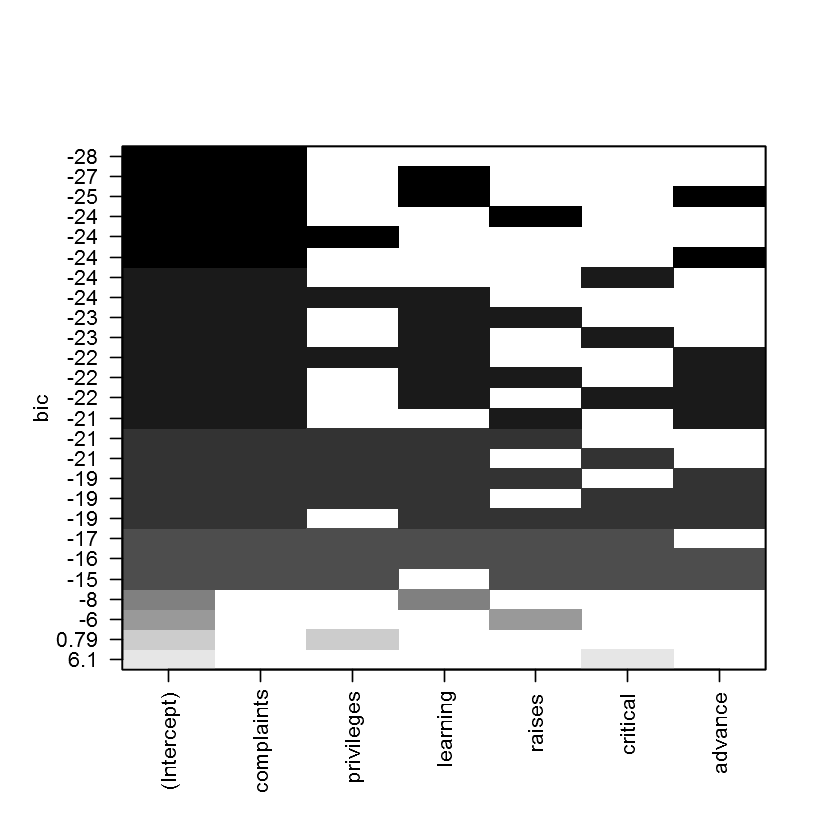

In [48]:
options(repr.plot.width=7, repr.plot.height=7)
plot(leaps)   #complaints만 들어간 것이 좋다 

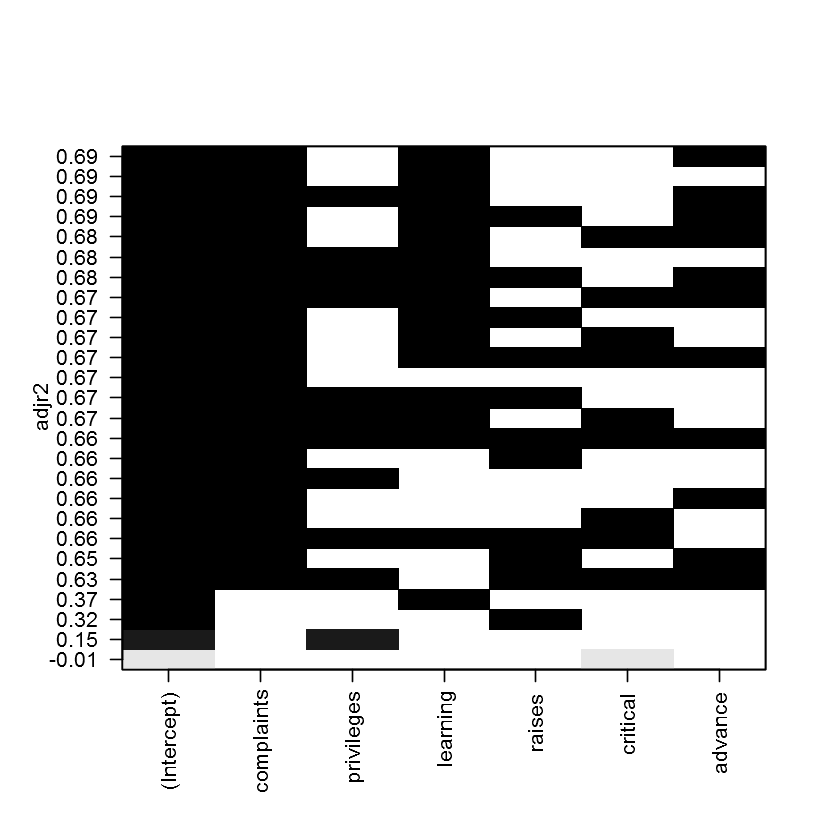

In [50]:
plot(leaps, scale="adjr2")
## BIC를 기준으로, 제일 좋은 모형은 complaints와 learning, advnace가 들어 간게 제일 좋다 
## 맨 윗줄이 색칠되어 있는 부분을 보면 된다

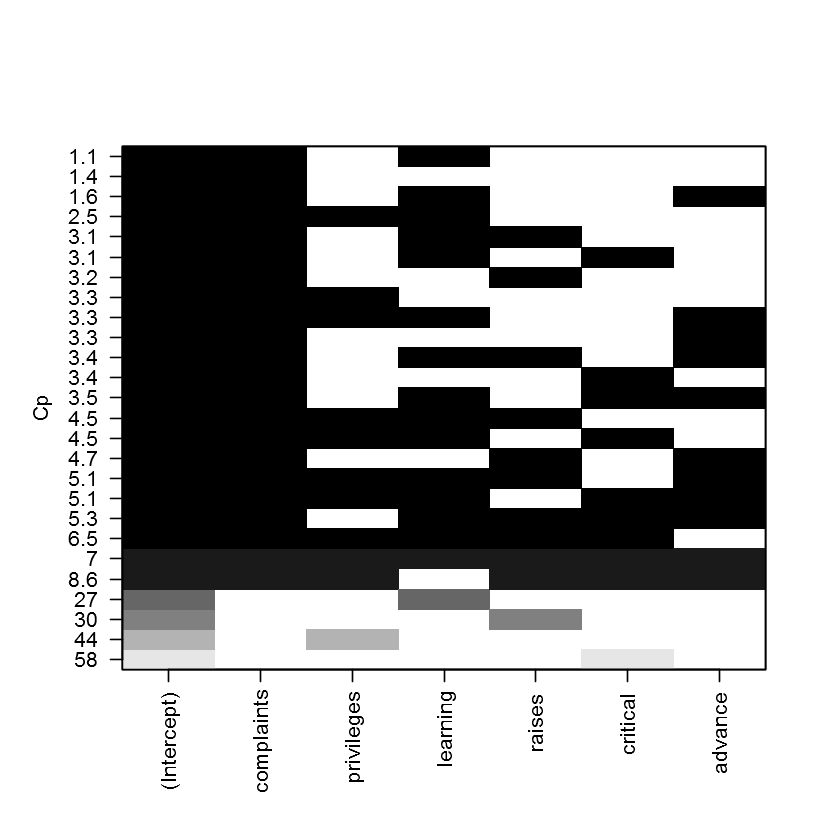

In [52]:
plot(leaps, scale="Cp")

    2.	La Quinta Motor Inns은 전미에 위치한 business traveler를 위한 모텔 체인이다. 이 회사는 최근에 시장 점유율을 늘리기 위해 새로운 모텔을 지으려 한다. 회사의 매니저는 이익에 영향을 주는 요소를 파악하여 새 모텔을 짓기에 적절한 지역을 예측하기 위해 100개의 La Quinta 모텔을 무작위로 선정하여 아래의 변수들을 수집하였다. 
    -	Margin: operating margin (%). 
    -	Number: 해당 모텔의 3 마일 반경 안에 있는 모텔이나 호텔 방의 수 (competition)
    -	Nearest:  가장 가까운 경쟁 모텔 혹은 호텔 과의 거리 (in miles)
    -	Office. Space: 커뮤니티에 있는 사무실 규모 (in 1000 ft^2)
    -	Enrollment: 근처 대학의 등록자 수 (in 1000명)
    -	Income: 커뮤니티의 중위소득 (in $1000)
    -	Distance: 시내 중심까지의 거리 (in miles)


In [53]:
laq <- read.csv("SLData/laquinta.csv")
summary(laq)

     Margin          Number        Nearest       Office.Space     Enrollment   
 Min.   :27.30   Min.   :1613   Min.   :0.100   Min.   :140.0   Min.   : 6.00  
 1st Qu.:40.15   1st Qu.:2729   1st Qu.:1.675   1st Qu.:391.5   1st Qu.:13.38  
 Median :46.00   Median :2934   Median :2.250   Median :486.5   Median :16.00  
 Mean   :45.74   Mean   :2985   Mean   :2.310   Mean   :492.2   Mean   :16.07  
 3rd Qu.:51.62   3rd Qu.:3269   3rd Qu.:2.925   3rd Qu.:588.0   3rd Qu.:19.50  
 Max.   :62.80   Max.   :4214   Max.   :4.200   Max.   :875.0   Max.   :26.50  
     Income         Distance     
 Min.   :28.00   Min.   : 0.200  
 1st Qu.:33.00   1st Qu.: 4.550  
 Median :36.00   Median : 7.350  
 Mean   :36.22   Mean   : 6.918  
 3rd Qu.:39.00   3rd Qu.: 9.025  
 Max.   :46.00   Max.   :14.400  

 - a.	Scatter plot matrix를 통해 자료의 산점도를 살펴보시오.

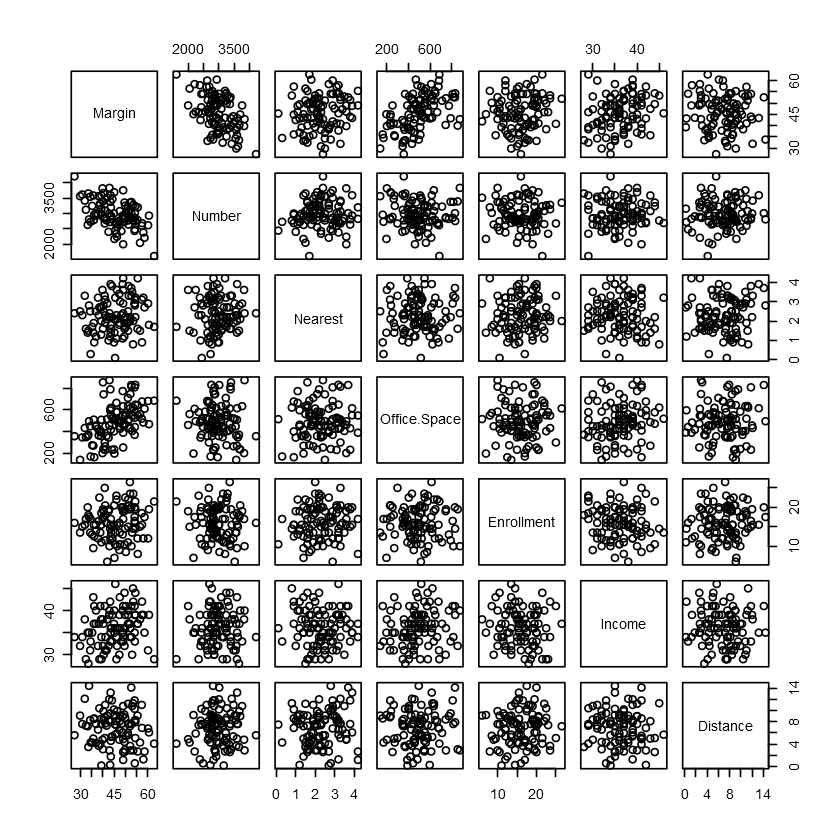

In [55]:
## 설명변수간의 correlation도 낮다. 종속변수와도 낮다. (큰 의미 없는 data인듯...)
plot(laq)

 - b.	Margin을 다른 변수들로 설명하는 회귀식을 세우고 추정하시오.

In [57]:
out15 <- lm(Margin~., laq)
summary(out15)


Call:
lm(formula = Margin ~ ., data = laq)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.267  -3.022  -0.086   4.234  13.596 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  38.138575   6.992948   5.454 4.04e-07 ***
Number       -0.007618   0.001255  -6.069 2.77e-08 ***
Nearest       1.646237   0.632837   2.601   0.0108 *  
Office.Space  0.019766   0.003410   5.796 9.24e-08 ***
Enrollment    0.211783   0.133428   1.587   0.1159    
Income        0.413122   0.139552   2.960   0.0039 ** 
Distance     -0.225258   0.178709  -1.260   0.2107    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.512 on 93 degrees of freedom
Multiple R-squared:  0.5251,	Adjusted R-squared:  0.4944 
F-statistic: 17.14 on 6 and 93 DF,  p-value: 3.034e-13


 - c.회귀모형의 유의여부
  - F-test의 P-value가 매우 작다. 유의하다. Ho를 기각한다. 의미있는 선형식이다!
 - d. 회귀계수 유의여부
  - Enrollment, Distance는 큰 의미 없어 보인다. 
  - Number = 근처에 1개 있을 때 Margin율이 0.7% 내려간다는 의미 
  - Office.Space = 근처에 커뮤니티 사무실 규모가 1,000 ft^2 증가 시, Margin 1.9% 증가

 - 잔차분석

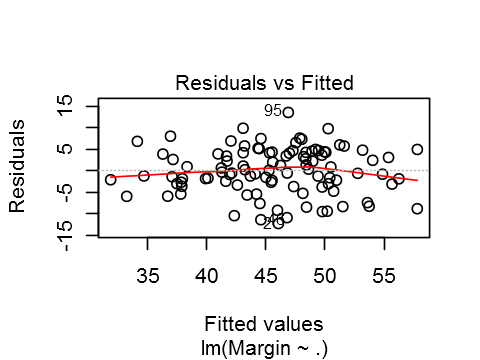

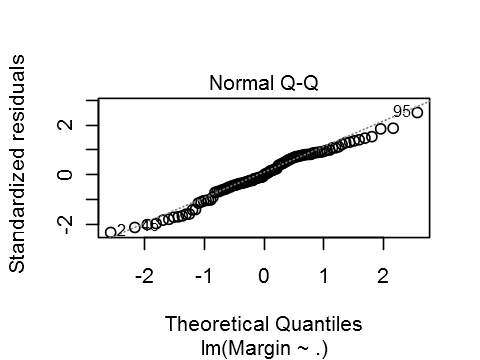

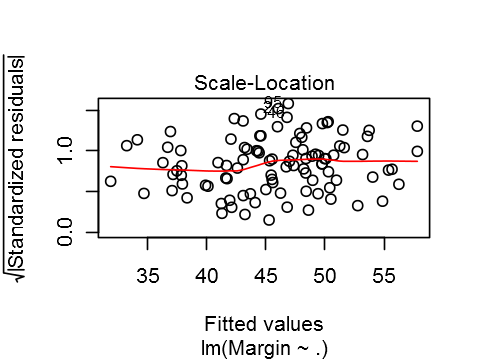

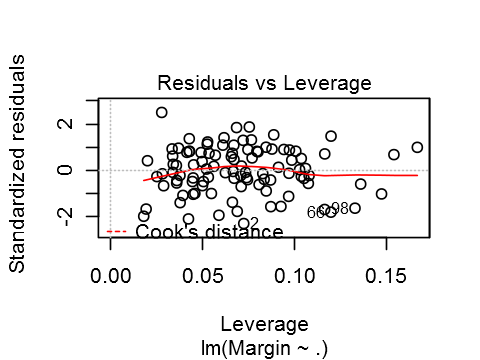

In [62]:
## 크게 벗어나는 점이 없다 (Cook's distance에서 나가는 점이 없다)
options(repr.plot.width=4, repr.plot.height=3)
plot(out15)

 - 각 회귀계수 해석

,Margin,Number,Nearest,Office.Space,Enrollment,Income,Distance
Margin,1.000,-0.470,0.160,0.501,0.123,0.248,-0.092
Number,-0.470,1.000,0.082,-0.093,-0.064,0.037,0.073
Nearest,0.160,0.082,1.000,0.043,0.071,-0.045,0.091
Office.Space,0.501,-0.093,0.043,1.000,-0.001,0.153,0.033
Enrollment,0.123,-0.064,0.071,-0.001,1.000,-0.113,0.097
Income,0.248,0.037,-0.045,0.153,-0.113,1.000,-0.052
Distance,-0.092,0.073,0.091,0.033,0.097,-0.052,1.000


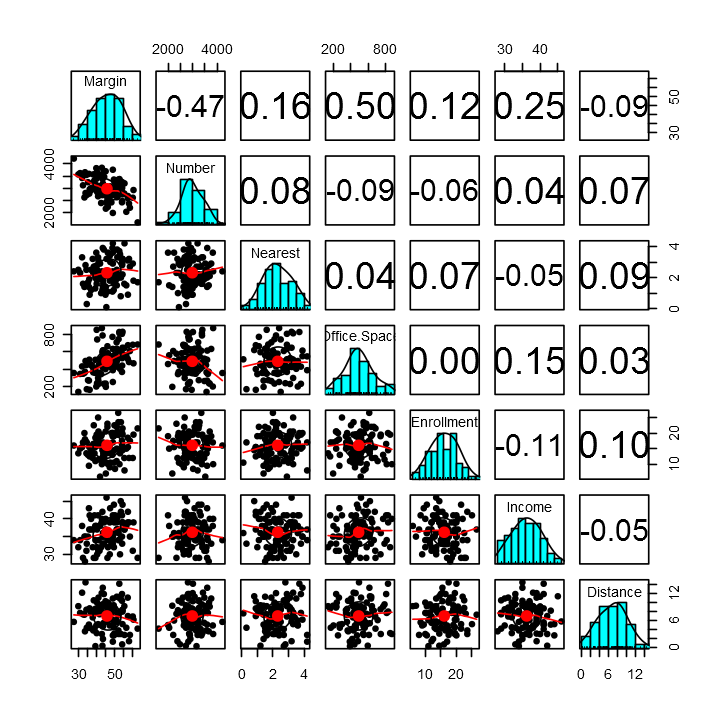

In [66]:
options(repr.plot.width=6, repr.plot.height=6)
pairs.panels(laq)
round(cor(laq),3)

g.	3마일 안에 3815개의 경쟁 모텔의 방이 있고, 가장 가까운 호텔 또는 모텔이 0.9 마일 떨어져 있고, <br> 해당 커뮤니티의 사무실 규모가 476,000ft^2이고, 근처에 두 대학에 24500명의 학생이 등록해있으며, <br> 중위소득이 $35,000 이고 시내중심까지의 거리가 11.2마일인 지역의 Margin을 95% 신뢰구간으로 예측하시오.

In [68]:
summary(laq)
predict(out15, data.frame("Number"=3815, "Nearest"=0.9, "Office.Space"=476,
                          "Enrollment"=24.5, "Income"=35, "Distance"=11.2),
        interval="confidence")


     Margin          Number        Nearest       Office.Space     Enrollment   
 Min.   :27.30   Min.   :1613   Min.   :0.100   Min.   :140.0   Min.   : 6.00  
 1st Qu.:40.15   1st Qu.:2729   1st Qu.:1.675   1st Qu.:391.5   1st Qu.:13.38  
 Median :46.00   Median :2934   Median :2.250   Median :486.5   Median :16.00  
 Mean   :45.74   Mean   :2985   Mean   :2.310   Mean   :492.2   Mean   :16.07  
 3rd Qu.:51.62   3rd Qu.:3269   3rd Qu.:2.925   3rd Qu.:588.0   3rd Qu.:19.50  
 Max.   :62.80   Max.   :4214   Max.   :4.200   Max.   :875.0   Max.   :26.50  
     Income         Distance     
 Min.   :28.00   Min.   : 0.200  
 1st Qu.:33.00   1st Qu.: 4.550  
 Median :36.00   Median : 7.350  
 Mean   :36.22   Mean   : 6.918  
 3rd Qu.:39.00   3rd Qu.: 9.025  
 Max.   :46.00   Max.   :14.400  

,fit,lwr,upr
1,37.09149,32.96972,41.21326


 - h.	BIC 값을 최소로 하는 설명변수의 조합을 찾아 회귀식을 추정하시오

Subset selection object
Call: regsubsets.formula(Margin ~ ., laq)
6 Variables  (and intercept)
             Forced in Forced out
Number           FALSE      FALSE
Nearest          FALSE      FALSE
Office.Space     FALSE      FALSE
Enrollment       FALSE      FALSE
Income           FALSE      FALSE
Distance         FALSE      FALSE
1 subsets of each size up to 6
Selection Algorithm: exhaustive

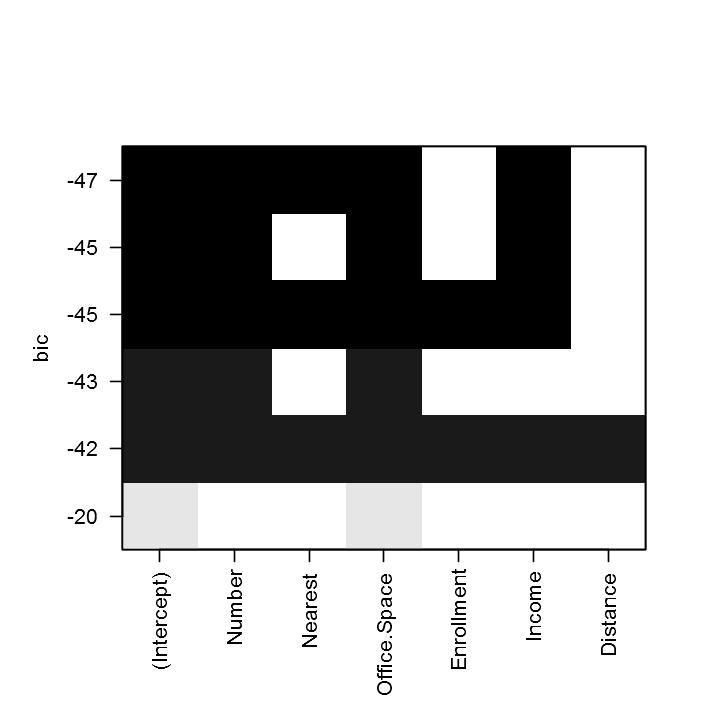

In [71]:
leaps2 <- regsubsets(Margin~., laq)
leaps2
plot(leaps2)
### BIC : log-likeliehood + penalty on number of variables

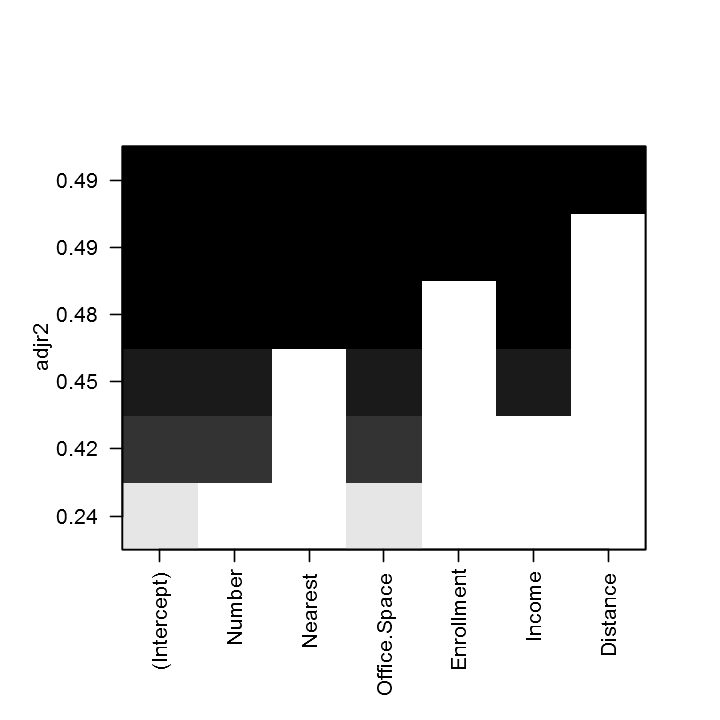

In [72]:
plot(leaps2, scale="adjr2")
## 다른 기준인 adjr2을 적용한 사례